## Principais libs que usaremos: 

In [11]:
# Esse projeto foi feito com o objetivo educativo para a matéria de Programção para Ciência dos dados
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
# Junta as 3 tabelas de produção (uma em cima da outra)
df_producao_total = pd.concat([df_prod_01, df_prod_05, df_prod_08], ignore_index=True)

# Libera a memória, já que não precisamos mais das partes separadas
del df_prod_01
del df_prod_05
del df_prod_08

print(f"Tabelas de produção combinadas!")
print(f"Total de registros para analisar: {len(df_producao_total)}")



Tabelas de produção combinadas!
Total de registros para analisar: 13210711


In [37]:
df_producao_total.head(n=10)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,...,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,R,0,NaN,0.0,0.0,0.0,121003.0,NaN,3999
1,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,R,0,NaN,0.0,0.0,0.0,121003.0,NaN,3999
2,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999
3,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999
4,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999
5,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999
6,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999
7,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999
8,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999
9,2254611,431720,PG,431720,0,0,0,5,0,I,...,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,3999


In [13]:
import pandas as pd

# Define o caminho base para facilitar (opcional, mas limpo)
base_path = '/kaggle/input/'

# --- 1. TAREFAS FATO (Os eventos, a produção) ---
# Estas são as tabelas principais. Elas registram os eventos (atendimentos).
# Os nomes (PARS2501, PARS2505, PARS2508) sugerem que são dados mensais
# (ex: Janeiro, Maio, Agosto de 2025). Vamos carregá-los e juntá-los.

print("Carregando tabelas de produção (PARS)...")

# O que é: Tabela FATO - Produção Ambulatorial (Parte 1, ex: Mês 1)
# O que vamos contar: Registros de procedimentos, valores, local, paciente, etc.
df_prod_01 = pd.read_csv(base_path + 'PARS2501.csv', encoding='latin1', low_memory=False)

# O que é: Tabela FATO - Produção Ambulatorial (Parte 2, ex: Mês 5)
# O que vamos contar: Mais registros de procedimentos...
df_prod_05 = pd.read_csv(base_path + 'PARS2505.csv', encoding='latin1', low_memory=False)

# O que é: Tabela FATO - Produção Ambulatorial (Parte 3, ex: Mês 8)
# O que vamos contar: Mais registros de procedimentos...
df_prod_08 = pd.read_csv(base_path + 'PARS2508.csv', encoding='latin1', low_memory=False)

# --- 2. TAREFAS DIMENSÃO (Os dicionários, "de-para") ---
# Estas são as tabelas auxiliares que dão nome aos códigos das tabelas FATO.

print("Carregando tabelas de dimensão (dicionários)...")

# O que é: Tabela de Procedimentos (SIGTAP)
# O que vamos usar: Dar nome aos códigos de procedimento (ex: '0301010072' -> 'CONSULTA MEDICA')
df_procedimentos = pd.read_csv(base_path + 'TB_SIGTAW.csv', encoding='latin1', low_memory=False)

# O que é: Tabela de Municípios (IBGE)
# O que vamos usar: Dar nome aos códigos de município (ex: '431020' -> 'Ijuí').
# ESSENCIAL para a análise de fluxo de pacientes (item 4 do seu trabalho).
df_municipios = pd.read_csv(base_path + 'tb_municip.csv', encoding='latin1', low_memory=False)

# O que é: Tabela de Doenças (Classificação Internacional de Doenças - CID)
# O que vamos usar: Dar nome aos códigos de diagnóstico (ex: 'I10' -> 'Hipertensão Essencial').
df_cid = pd.read_csv(base_path + 'S_CID.csv', encoding='latin1', low_memory=False)

# O que é: Tabela de Ocupações (Classificação Brasileira de Ocupações - CBO)
# O que vamos usar: Dar nome aos códigos de ocupação do profissional
# (ex: '225125' -> 'Médico Clínico').
df_cbo = pd.read_csv(base_path + 'CBO.csv', encoding='latin1', low_memory=False)

# O que é: Cadastro de Estabelecimentos (CNES)
# O que vamos usar: Dar nome e endereço aos códigos de hospitais, clínicas e UBS
# (ex: '2254611' -> 'HOSPITAL DE CARIDADE DE IJUI').
df_estabelecimentos = pd.read_csv(base_path + 'CADGERRS.csv', encoding='latin1', low_memory=False)

# O que é: Tabela de Relação (RL) Município -> Microrregião
# O que vamos usar: Ligar um código de município a um código de microrregião.
df_rl_mun_micro = pd.read_csv(base_path + 'rl_municip_micibge.csv', encoding='latin1', low_memory=False)

# O que é: Tabela de Microrregiões (IBGE)
# O que vamos usar: Dar nome ao código da microrregião (ex: '11001' -> 'Porto Velho').
df_microrregioes = pd.read_csv(base_path + 'tb_micibge.csv', encoding='latin1', low_memory=False)

print("\nTodos os arquivos foram carregados com sucesso!")

Carregando tabelas de produção (PARS)...
Carregando tabelas de dimensão (dicionários)...

Todos os arquivos foram carregados com sucesso!


In [16]:
print(df_producao_total.columns.tolist())

['PA_CODUNI', 'PA_GESTAO', 'PA_CONDIC', 'PA_UFMUN', 'PA_REGCT', 'PA_INCOUT', 'PA_INCURG', 'PA_TPUPS', 'PA_TIPPRE', 'PA_MN_IND', 'PA_CNPJCPF', 'PA_CNPJMNT', 'PA_CNPJ_CC', 'PA_MVM', 'PA_CMP', 'PA_PROC_ID', 'PA_TPFIN', 'PA_SUBFIN', 'PA_NIVCPL', 'PA_DOCORIG', 'PA_AUTORIZ', 'PA_CNSMED', 'PA_CBOCOD', 'PA_MOTSAI', 'PA_OBITO', 'PA_ENCERR', 'PA_PERMAN', 'PA_ALTA', 'PA_TRANSF', 'PA_CIDPRI', 'PA_CIDSEC', 'PA_CIDCAS', 'PA_CATEND', 'PA_IDADE', 'IDADEMIN', 'IDADEMAX', 'PA_FLIDADE', 'PA_SEXO', 'PA_RACACOR', 'PA_MUNPCN', 'PA_QTDPRO', 'PA_QTDAPR', 'PA_VALPRO', 'PA_VALAPR', 'PA_UFDIF', 'PA_MNDIF', 'PA_DIF_VAL', 'NU_VPA_TOT', 'NU_PA_TOT', 'PA_INDICA', 'PA_CODOCO', 'PA_FLQT', 'PA_FLER', 'PA_ETNIA', 'PA_VL_CF', 'PA_VL_CL', 'PA_VL_INC', 'PA_SRV_C', 'PA_INE', 'PA_NAT_JUR']


In [17]:
# A chave da nossa tabela principal (produção) é 'PA_MUNPCN'
chave_principal = 'PA_MUNPCN'

# A chave da nossa tabela auxiliar (municípios) é 'CO_MUNICIP'
chave_auxiliar = 'CO_MUNICIP'

# Converte ambas as colunas-chave para string (texto) para garantir o merge
df_producao_total[chave_principal] = df_producao_total[chave_principal].astype(str)
df_municipios[chave_auxiliar] = df_municipios[chave_auxiliar].astype(str)

print(f"Tipos das chaves '{chave_principal}' e '{chave_auxiliar}' corrigidos para string!")

Tipos das chaves 'PA_MUNPCN' e 'CO_MUNICIP' corrigidos para string!


In [18]:
# Vamos criar nosso dataframe de análise final, começando com este merge
# Puxamos apenas as colunas de nome e UF da tabela de municípios
df_analise = pd.merge(
    left=df_producao_total,
    right=df_municipios[['CO_MUNICIP', 'DS_NOME', 'CO_UF']], 
    left_on=chave_principal,    # Chave da tabela principal (ex: '431020')
    right_on=chave_auxiliar,   # Chave da tabela auxiliar (ex: '431020')
    how='left'                 # 'left' garante que não vamos perder nenhuma linha da principal
)

print("Merge com Municípios concluído!")

# Vamos verificar o resultado
print("\nVerificando as 5 primeiras linhas do resultado:")

# Vamos renomear as colunas para ficar mais claro
df_analise.rename(columns={'DS_NOME': 'MUNICIPIO_PACIENTE', 'CO_UF': 'UF_PACIENTE'}, inplace=True)

# Mostra as colunas originais e as novas que foram "puxadas"
print(df_analise[['PA_MUNPCN', 'MUNICIPIO_PACIENTE', 'UF_PACIENTE']].head())

Merge com Municípios concluído!

Verificando as 5 primeiras linhas do resultado:
  PA_MUNPCN MUNICIPIO_PACIENTE UF_PACIENTE
0    431720         Santa Rosa          43
1    430960        Horizontina          43
2    999999           Invalido          XX
3    999999           Invalido          XX
4    999999           Invalido          XX


In [19]:
# A chave da nossa tabela de análise é 'PA_PROC_ID'
chave_principal = 'PA_PROC_ID'

# A chave da nossa tabela auxiliar (procedimentos) é 'IP_COD'
chave_auxiliar = 'IP_COD'

# Converte ambas as colunas-chave para string (texto)
df_analise[chave_principal] = df_analise[chave_principal].astype(str)
df_procedimentos[chave_auxiliar] = df_procedimentos[chave_auxiliar].astype(str)

print(f"Tipos das chaves '{chave_principal}' e '{chave_auxiliar}' corrigidos para string!")

Tipos das chaves 'PA_PROC_ID' e 'IP_COD' corrigidos para string!


In [20]:
# Agora fazemos o merge no 'df_analise' (que já tem os nomes dos municípios)
# Vamos puxar apenas a coluna 'IP_DSCR' (Descrição do Procedimento)
df_analise = pd.merge(
    left=df_analise,
    right=df_procedimentos[['IP_COD', 'IP_DSCR']], 
    left_on=chave_principal,    # Chave da tabela principal (ex: '0301010072')
    right_on=chave_auxiliar,   # Chave da tabela auxiliar (ex: '0301010072')
    how='left'                 # 'left' para não perder nenhum registro
)

print("Merge com Procedimentos concluído!")

# Vamos renomear a nova coluna para ficar claro
df_analise.rename(columns={'IP_DSCR': 'NOME_PROCEDIMENTO'}, inplace=True)

# Verifica o resultado, mostrando a coluna do código e a nova coluna com o nome
print("\nVerificando as 5 primeiras linhas do resultado:")
print(df_analise[['PA_PROC_ID', 'NOME_PROCEDIMENTO']].head())

Merge com Procedimentos concluído!

Verificando as 5 primeiras linhas do resultado:
  PA_PROC_ID                         NOME_PROCEDIMENTO
0  206010079      TOMOGRAFIA COMPUTADORIZADA DO CRANIO
1  206020031       TOMOGRAFIA COMPUTADORIZADA DE TORAX
2  301010072  CONSULTA MEDICA EM ATENCAO ESPECIALIZADA
3  301010072  CONSULTA MEDICA EM ATENCAO ESPECIALIZADA
4  301010072  CONSULTA MEDICA EM ATENCAO ESPECIALIZADA


In [21]:
# A chave da nossa tabela de análise é 'PA_CODUNI'
chave_principal = 'PA_CODUNI'

# A chave da nossa tabela auxiliar (estabelecimentos) é 'CNES'
chave_auxiliar = 'CNES'

# Converte ambas as colunas-chave para string (texto)
df_analise[chave_principal] = df_analise[chave_principal].astype(str)
df_estabelecimentos[chave_auxiliar] = df_estabelecimentos[chave_auxiliar].astype(str)

print(f"Tipos das chaves '{chave_principal}' e '{chave_auxiliar}' corrigidos para string!")

Tipos das chaves 'PA_CODUNI' e 'CNES' corrigidos para string!


In [22]:
# Vamos puxar o 'NOME FANTASIA' e a 'RAZAO SOCIAL' do estabelecimento
df_analise = pd.merge(
    left=df_analise,
    right=df_estabelecimentos[['CNES', 'FANTASIA', 'RAZ_SOCI']], 
    left_on=chave_principal,    # Chave da tabela principal (ex: '2254611')
    right_on=chave_auxiliar,   # Chave da tabela auxiliar (ex: '2254611')
    how='left'                 # 'left' para não perder nenhum registro
)

print("Merge com Estabelecimentos concluído!")

# Renomeia as colunas para ficar mais claro
df_analise.rename(columns={
    'FANTASIA': 'NOME_ESTABELECIMENTO',
    'RAZ_SOCI': 'RAZAO_SOCIAL_ESTAB'
}, inplace=True)

# Verifica o resultado, mostrando o código e os novos nomes
print("\nVerificando as 5 primeiras linhas do resultado:")
print(df_analise[['PA_CODUNI', 'NOME_ESTABELECIMENTO']].head())

Merge com Estabelecimentos concluído!

Verificando as 5 primeiras linhas do resultado:
  PA_CODUNI NOME_ESTABELECIMENTO
0   2254611  HOSPITAL VIDA SAUDE
1   2254611  HOSPITAL VIDA SAUDE
2   2254611  HOSPITAL VIDA SAUDE
3   2254611  HOSPITAL VIDA SAUDE
4   2254611  HOSPITAL VIDA SAUDE


In [23]:
# A chave da nossa tabela de análise é 'PA_CIDPRI'
chave_principal = 'PA_CIDPRI'

# A chave da nossa tabela auxiliar (CID) é 'CD_COD'
chave_auxiliar = 'CD_COD'

# Converte ambas as colunas-chave para string (texto)
df_analise[chave_principal] = df_analise[chave_principal].astype(str)
df_cid[chave_auxiliar] = df_cid[chave_auxiliar].astype(str)

print(f"Tipos das chaves '{chave_principal}' e '{chave_auxiliar}' corrigidos para string!")

Tipos das chaves 'PA_CIDPRI' e 'CD_COD' corrigidos para string!


In [24]:
# Vamos puxar a 'CD_DESCR' (Descrição do CID)
df_analise = pd.merge(
    left=df_analise,
    right=df_cid[['CD_COD', 'CD_DESCR']], 
    left_on=chave_principal,    # Chave da tabela principal (ex: 'I10')
    right_on=chave_auxiliar,   # Chave da tabela auxiliar (ex: 'I10')
    how='left'                 # 'left' para não perder nenhum registro
)

print("Merge com Diagnósticos (CID) concluído!")

# Renomeia a coluna para ficar mais claro
df_analise.rename(columns={'CD_DESCR': 'NOME_DIAGNOSTICO'}, inplace=True)

# Verifica o resultado
print("\nVerificando as 5 primeiras linhas do resultado:")
print(df_analise[['PA_CIDPRI', 'NOME_DIAGNOSTICO']].head())

Merge com Diagnósticos (CID) concluído!

Verificando as 5 primeiras linhas do resultado:
  PA_CIDPRI   NOME_DIAGNOSTICO
0      R529       R52.9 Dor NE
1      R529       R52.9 Dor NE
2      0000  CID NAO INFORMADO
3      0000  CID NAO INFORMADO
4      0000  CID NAO INFORMADO


In [25]:
# A chave da nossa tabela de análise é 'PA_CBOCOD'
chave_principal = 'PA_CBOCOD'

# A chave da nossa tabela auxiliar (CBO) é 'CBO'
chave_auxiliar = 'CBO'

# Converte ambas as colunas-chave para string (texto)
df_analise[chave_principal] = df_analise[chave_principal].astype(str)
df_cbo[chave_auxiliar] = df_cbo[chave_auxiliar].astype(str)

print(f"Tipos das chaves '{chave_principal}' e '{chave_auxiliar}' corrigidos para string!")

Tipos das chaves 'PA_CBOCOD' e 'CBO' corrigidos para string!


In [26]:
# Vamos puxar a 'DS_CBO' (Descrição do CBO)
df_analise = pd.merge(
    left=df_analise,
    right=df_cbo[['CBO', 'DS_CBO']], 
    left_on=chave_principal,    # Chave da tabela principal (ex: '225125')
    right_on=chave_auxiliar,   # Chave da tabela auxiliar (ex: '225125')
    how='left'                 # 'left' para não perder nenhum registro
)

print("Merge com Ocupações (CBO) concluído!")

# Renomeia a coluna para ficar mais claro
df_analise.rename(columns={'DS_CBO': 'NOME_OCUPACAO'}, inplace=True)

# Verifica o resultado
print("\nVerificando as 5 primeiras linhas do resultado:")
print(df_analise[['PA_CBOCOD', 'NOME_OCUPACAO']].head())

Merge com Ocupações (CBO) concluído!

Verificando as 5 primeiras linhas do resultado:
  PA_CBOCOD                                  NOME_OCUPACAO
0    225320  Medico em radiologia e diagnostico por imagem
1    225320  Medico em radiologia e diagnostico por imagem
2    225203                    Medico em cirurgia vascular
3    225203                    Medico em cirurgia vascular
4    225203                    Medico em cirurgia vascular


# Análise em ijuí

# Merge de tabelas apenas com os dados de "Ijuí"
Neste ponto reduzimos **13.2 milhões** de linhas para **160 mil registros** (os que realmente importam para Ijuí) essa ação é crucial para o bom andamento dos testes a seguir, melhorando muito nossa eficiência!

- O uso de memória caiu de **7.4+ GB** para apenas **86.7 MB**.
- Agora temos uma tabela leve, rápida e com todas as informações que precisamos para a análise

In [27]:
import pandas as pd

print("--- Iniciando Análise Focada em Ijuí ---")

# --- PASSO 1: Encontrar o Código de Ijuí ---
# (Precisamos que a chave df_municipios['CO_MUNICIP'] já seja string)
try:
    ijui_info = df_municipios[df_municipios['DS_NOME'] == 'Ijui']
    codigo_ijui_str = ijui_info['CO_MUNICIP'].values[0]
    
    # A coluna PA_UFMUN (Município do Estabelecimento) é int64 (número)
    # Precisamos converter o código de Ijuí para int para o filtro funcionar
    codigo_ijui_int = int(codigo_ijui_str)
    
    print(f"Código de Ijuí encontrado: {codigo_ijui_int} (como número)")

except Exception as e:
    print(f"ERRO: Não foi possível encontrar o código de Ijuí. Verifique se df_municipios está carregado.")
    print(f"Detalhe do erro: {e}")

# --- PASSO 2: Filtrar a Tabela Gigante (13M de linhas) ---
print(f"Filtrando {len(df_producao_total)} registros para focar apenas em Ijuí...")

# Criamos um NOVO DataFrame SÓ com atendimentos feitos em estabelecimentos de Ijuí
# Usamos .copy() para garantir que é um objeto novo e evitar erros de memória
df_ijui_producao = df_producao_total[df_producao_total['PA_UFMUN'] == codigo_ijui_int].copy()

print(f"Filtro Concluído! Tabela reduzida para {len(df_ijui_producao)} registros.")

# --- PASSO 3: Preparar Chaves da Nova Tabela de Ijuí ---
# Agora, convertemos as chaves de merge *desta tabela pequena* para string
print("Preparando chaves da tabela de Ijuí para os merges...")
df_ijui_producao['PA_MUNPCN'] = df_ijui_producao['PA_MUNPCN'].astype(str)
df_ijui_producao['PA_PROC_ID'] = df_ijui_producao['PA_PROC_ID'].astype(str)
df_ijui_producao['PA_CODUNI'] = df_ijui_producao['PA_CODUNI'].astype(str)
df_ijui_producao['PA_CIDPRI'] = df_ijui_producao['PA_CIDPRI'].astype(str)
df_ijui_producao['PA_CBOCOD'] = df_ijui_producao['PA_CBOCOD'].astype(str)

# --- PASSO 4: Executar Merges na Tabela Pequena de Ijuí ---
print("Iniciando merges...")

# Merge 1: Município do Paciente (Onde o paciente mora)
df_analise = pd.merge(df_ijui_producao, df_municipios[['CO_MUNICIP', 'DS_NOME', 'CO_UF']], 
                      left_on='PA_MUNPCN', right_on='CO_MUNICIP', how='left')
df_analise.rename(columns={'DS_NOME': 'MUNICIPIO_PACIENTE', 'CO_UF': 'UF_PACIENTE'}, inplace=True)
print("Merge 1/5 (Município Paciente) OK")

# Merge 2: Nome do Procedimento
df_analise = pd.merge(df_analise, df_procedimentos[['IP_COD', 'IP_DSCR']], 
                      left_on='PA_PROC_ID', right_on='IP_COD', how='left')
df_analise.rename(columns={'IP_DSCR': 'NOME_PROCEDIMENTO'}, inplace=True)
print("Merge 2/5 (Nome Procedimento) OK")

# Merge 3: Nome do Estabelecimento (Hospital, UBS)
df_analise = pd.merge(df_analise, df_estabelecimentos[['CNES', 'FANTASIA']], 
                      left_on='PA_CODUNI', right_on='CNES', how='left')
df_analise.rename(columns={'FANTASIA': 'NOME_ESTABELECIMENTO'}, inplace=True)
print("Merge 3/5 (Nome Estabelecimento) OK")

# Merge 4: Nome do Diagnóstico (Doença)
df_analise = pd.merge(df_analise, df_cid[['CD_COD', 'CD_DESCR']], 
                      left_on='PA_CIDPRI', right_on='CD_COD', how='left')
df_analise.rename(columns={'CD_DESCR': 'NOME_DIAGNOSTICO'}, inplace=True)
print("Merge 4/5 (Nome Diagnóstico) OK")

# Merge 5: Nome da Ocupação (Profissional)
df_analise = pd.merge(df_analise, df_cbo[['CBO', 'DS_CBO']], 
                      left_on='PA_CBOCOD', right_on='CBO', how='left')
df_analise.rename(columns={'DS_CBO': 'NOME_OCUPACAO'}, inplace=True)
print("Merge 5/5 (Nome Ocupação) OK")

print("\n--- 💾 ANÁLISE DE IJUÍ PRONTA E CARREGADA ---")

# --- PASSO 5: Verificar Resultado ---
# Vamos ver o resultado e o novo uso de memória
df_analise.info()

--- Iniciando Análise Focada em Ijuí ---
Código de Ijuí encontrado: 431020 (como número)
Filtrando 13210711 registros para focar apenas em Ijuí...
Filtro Concluído! Tabela reduzida para 160060 registros.
Preparando chaves da tabela de Ijuí para os merges...
Iniciando merges...
Merge 1/5 (Município Paciente) OK
Merge 2/5 (Nome Procedimento) OK
Merge 3/5 (Nome Estabelecimento) OK
Merge 4/5 (Nome Diagnóstico) OK
Merge 5/5 (Nome Ocupação) OK

--- 💾 ANÁLISE DE IJUÍ PRONTA E CARREGADA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160060 entries, 0 to 160059
Data columns (total 71 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PA_CODUNI             160060 non-null  object 
 1   PA_GESTAO             160060 non-null  int64  
 2   PA_CONDIC             160060 non-null  object 
 3   PA_UFMUN              160060 non-null  int64  
 4   PA_REGCT              160060 non-null  int64  
 5   PA_INCOUT             160060 non

In [28]:
# Lista de colunas para remover (quase vazias ou inúteis)
colunas_para_remover = [
    'PA_ETNIA',          # Quase vazia (310 registros)
    'PA_INE',            # Totalmente vazia (0 registros)
    'PA_SRV_C'           # Mais da metade vazia
]

# Apaga as colunas
df_analise.drop(columns=colunas_para_remover, inplace=True)

print("Colunas 'PA_ETNIA', 'PA_INE', e 'PA_SRV_C' foram removidas.")

Colunas 'PA_ETNIA', 'PA_INE', e 'PA_SRV_C' foram removidas.


In [29]:
# Mostra os 15 municípios de pacientes mais frequentes
print("Top 15 municípios de residência dos pacientes:")
print(df_analise['MUNICIPIO_PACIENTE'].value_counts().head(15))

Top 15 municípios de residência dos pacientes:
MUNICIPIO_PACIENTE
Ijui                    78559
Invalido                10439
Panambi                  7529
Joia                     5485
Catuipe                  4524
Augusto Pestana          3710
Crissiumal               3140
Cruz Alta                2856
Santo Augusto            2677
Palmeira Das Missoes     2594
Condor                   2545
Tres Passos              2354
Ajuricaba                2306
Santo Angelo             2035
Bozano                   1427
Name: count, dtype: int64


In [30]:
# Cria um novo DataFrame 'df_analise_limpa'
# que contém APENAS as linhas onde MUNICIPIO_PACIENTE NÃO é 'Invalido'
df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()

print(f"Registros inválidos ('Invalido') removidos.")
print(f"Total de registros original: {len(df_analise)}")
print(f"Total de registros limpos para análise: {len(df_analise_limpa)}")

Registros inválidos ('Invalido') removidos.
Total de registros original: 160060
Total de registros limpos para análise: 149621


In [31]:
# 1. Conta o total de atendimentos limpos
total_atendimentos = len(df_analise_limpa)

# 2. Conta quantos atendimentos são de pacientes que moram em 'Ijui'
atendimentos_de_ijui = len(df_analise_limpa[df_analise_limpa['MUNICIPIO_PACIENTE'] == 'Ijui'])

# 3. Calcula os de fora
atendimentos_de_fora = total_atendimentos - atendimentos_de_ijui

# 4. Calcula as porcentagens
pct_ijui = (atendimentos_de_ijui / total_atendimentos) * 100
pct_fora = (atendimentos_de_fora / total_atendimentos) * 100

# 5. Mostra o resultado para o gestor
print("--- 🏥 Análise de Fluxo Regional de Pacientes (Ijuí) ---")
print(f"Total de atendimentos analisados: {total_atendimentos}")
print(f"\nAtendimentos de pacientes de Ijuí: {atendimentos_de_ijui} ({pct_ijui:.2f}%)")
print(f"Atendimentos de pacientes de OUTROS MUNICÍPIOS: {atendimentos_de_fora} ({pct_fora:.2f}%)")

--- 🏥 Análise de Fluxo Regional de Pacientes (Ijuí) ---
Total de atendimentos analisados: 149621

Atendimentos de pacientes de Ijuí: 78559 (52.51%)
Atendimentos de pacientes de OUTROS MUNICÍPIOS: 71062 (47.49%)


# Top 10 municípios que mais enviam pacientes para Ijuí

In [32]:
# Filtrar o DataFrame para excluir 'Ijui'
df_pacientes_de_fora = df_analise_limpa[df_analise_limpa['MUNICIPIO_PACIENTE'] != 'Ijui']

# Contar os municípios restantes e pegar o Top 10
top_10_municipios = df_pacientes_de_fora['MUNICIPIO_PACIENTE'].value_counts().head(10)

print("--- 🗺️ Top 10 Municípios de Origem dos Pacientes (Excluindo Ijuí) ---")
print(top_10_municipios)

# Preparar dados para o gráfico
df_top_10_chart = top_10_municipios.reset_index()
df_top_10_chart.columns = ['Município', 'Total de Atendimentos']

import altair as alt

# Criar o gráfico de barras horizontal
chart = alt.Chart(df_top_10_chart).mark_bar().encode(
    # Ordenar pela contagem de atendimentos em ordem decrescente
    x=alt.X('Total de Atendimentos:Q'),
    y=alt.Y('Município:N', sort='-x'),
    tooltip=['Município', 'Total de Atendimentos']
).properties(
    title='Top 10 Municípios de Origem dos Pacientes Atendidos em Ijuí'
)

# Salvar o gráfico
chart.save('top_10_municipios_pacientes.json')

--- 🗺️ Top 10 Municípios de Origem dos Pacientes (Excluindo Ijuí) ---
MUNICIPIO_PACIENTE
Panambi                 7529
Joia                    5485
Catuipe                 4524
Augusto Pestana         3710
Crissiumal              3140
Cruz Alta               2856
Santo Augusto           2677
Palmeira Das Missoes    2594
Condor                  2545
Tres Passos             2354
Name: count, dtype: int64


# Quais hospitais, UBS e clínicas mais produzem em Ijuí?

In [33]:
# --- Etapa 1: Limpar os dados "Inválidos" ---
# (df_analise foi recarregado pela célula anterior)
df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
print(f"Total de registros limpos para análise: {len(df_analise_limpa)}")

# --- Etapa 2: Executar a Análise de Produção por Estabelecimento ---
# Conta a frequência de cada estabelecimento na tabela limpa
ranking_estabelecimentos = df_analise_limpa['NOME_ESTABELECIMENTO'].value_counts().head(10)

print("\n--- 🏥 Ranking de Produção por Estabelecimento (Top 10) ---")
print(ranking_estabelecimentos)

# --- Etapa 3: Gerar Gráfico ---
import altair as alt

# Preparar dados para o gráfico
df_chart_estab = ranking_estabelecimentos.reset_index()
df_chart_estab.columns = ['Estabelecimento', 'Nº de Procedimentos']

# Criar o gráfico de barras horizontal
chart = alt.Chart(df_chart_estab).mark_bar().encode(
    x=alt.X('Nº de Procedimentos:Q'),
    y=alt.Y('Estabelecimento:N', sort='-x'), # '-x' ordena do maior para o menor
    tooltip=['Estabelecimento', 'Nº de Procedimentos']
).properties(
    title='Top 10 Estabelecimentos por Nº de Procedimentos em Ijuí'
)

# Salvar o gráfico
chart.save('top_10_estabelecimentos.json')
print("Gráfico 'top_10_estabelecimentos.json' salvo.")

Total de registros limpos para análise: 149621

--- 🏥 Ranking de Produção por Estabelecimento (Top 10) ---
NOME_ESTABELECIMENTO
HOSPITAL DE CLINICAS IJUI                           58551
HOSPITAL BOM PASTOR IJUI                            26927
17 CRS IJUI                                         14181
CENTRO DE ATENCAO PSICOSSOCIAL CAPS AD              10522
CER III UNIR                                        10017
CENTRO DE ATENCAO PSICOSSOCIAL CAPS INFANTIL         6803
CENTRO AUDITIVO PROAUDI                              5504
POSTO CENTRAL SECRETARIA MUNICIPAL DA SAUDE IJUI     4335
APAE IJUI                                            3903
CENTRO DE ATENCAO PSICOSSOCIAL CAPS II               3751
Name: count, dtype: int64
Gráfico 'top_10_estabelecimentos.json' salvo.


# Quais pessoas mais vão a estes hospitais?

In [34]:
import pandas as pd
import altair as alt

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' (caso o kernel tenha reiniciado) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    print("DataFrame 'df_analise_limpa' recriado com sucesso.")
    print(f"Total de registros limpos para análise: {len(df_analise_limpa)}")

    # --- Etapa 2: Análise de Gênero (PA_SEXO) ---
    print("\n---  demographic Análise: Gênero ---")
    
    # Mapear os códigos para nomes legíveis (M=Masculino, F=Feminino)
    df_analise_limpa['GENERO'] = df_analise_limpa['PA_SEXO'].map({'M': 'Masculino', 'F': 'Feminino', 'I': 'Ignorado'})
    
    # Contar os valores e calcular a porcentagem
    dist_genero = df_analise_limpa['GENERO'].value_counts()
    dist_genero_pct = df_analise_limpa['GENERO'].value_counts(normalize=True) * 100
    
    print("Distribuição por Gênero:")
    print(dist_genero)
    print("\nDistribuição Percentual por Gênero:")
    print(dist_genero_pct.round(2))

    # --- Etapa 3: Análise de Idade (PA_IDADE) ---
    print("\n---  demographic Análise: Idade ---")
    
    # A coluna PA_IDADE no SIASUS é em ANOS.
    print("Estatísticas Descritivas da Idade:")
    print(df_analise_limpa['PA_IDADE'].describe().round(2))

    # Criar faixas etárias (bins)
    bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, 130]
    labels = ['0-9 anos', '10-19 anos', '20-29 anos', '30-39 anos', '40-49 anos', '50-59 anos', '60-69 anos', '70-79 anos', '80+ anos']
    
    df_analise_limpa['FAIXA_ETARIA'] = pd.cut(df_analise_limpa['PA_IDADE'], bins=bins, labels=labels, right=True)
    
    # Contar os valores em cada faixa etária
    dist_faixa_etaria = df_analise_limpa['FAIXA_ETARIA'].value_counts().sort_index()
    
    print("\nDistribuição por Faixa Etária:")
    print(dist_faixa_etaria)

    # --- Etapa 4: Gerar Gráfico de Faixa Etária ---
    
    # Preparar dados para o gráfico
    df_chart_idade = dist_faixa_etaria.reset_index()
    df_chart_idade.columns = ['Faixa Etária', 'Nº de Procedimentos']

    # Criar o gráfico de barras
    chart = alt.Chart(df_chart_idade).mark_bar().encode(
        x=alt.X('Faixa Etária:N', sort=None), # 'sort=None' mantém a ordem dos labels
        y=alt.Y('Nº de Procedimentos:Q'),
        tooltip=['Faixa Etária', 'Nº de Procedimentos']
    ).properties(
        title='Distribuição de Procedimentos por Faixa Etária em Ijuí'
    )

    # Salvar o gráfico
    chart.save('distribuicao_faixa_etaria.json')
    print("\nGráfico 'distribuicao_faixa_etaria.json' salvo.")

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciou).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recarregar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame 'df_analise_limpa' recriado com sucesso.
Total de registros limpos para análise: 149621

---  demographic Análise: Gênero ---
Distribuição por Gênero:
GENERO
Masculino    75384
Feminino     74237
Name: count, dtype: int64

Distribuição Percentual por Gênero:
GENERO
Masculino    50.38
Feminino     49.62
Name: proportion, dtype: float64

---  demographic Análise: Idade ---
Estatísticas Descritivas da Idade:
count    149621.00
mean         51.99
std          22.71
min           0.00
25%          38.00
50%          58.00
75%          69.00
max         107.00
Name: PA_IDADE, dtype: float64

Distribuição por Faixa Etária:
FAIXA_ETARIA
0-9 anos      10270
10-19 anos     9547
20-29 anos     8244
30-39 anos    11637
40-49 anos    16489
50-59 anos    23139
60-69 anos    33791
70-79 anos    26361
80+ anos      10143
Name: count, dtype: int64

Gráfico 'distribuicao_faixa_etaria.json' salvo.


# Epidemiológica: os principais diagnósticos (CID)

In [35]:
import pandas as pd
import altair as alt

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' (caso o kernel tenha reiniciado) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    print("DataFrame 'df_analise_limpa' recriado com sucesso.")

    # --- Etapa 2: Análise dos Principais Diagnósticos (CID) ---
    print("\n--- 🩺 Análise: Top 10 Principais Diagnósticos (CID) ---")
    
    # O .value_counts() automaticamente conta os valores mais frequentes
    # e ignora os diagnósticos nulos (NaN)
    top_10_diagnosticos = df_analise_limpa['NOME_DIAGNOSTICO'].value_counts().head(10)
    
    print("Top 10 diagnósticos mais frequentes em Ijuí:")
    print(top_10_diagnosticos)

    # --- Etapa 3: Gerar Gráfico ---
    
    # Preparar dados para o gráfico
    df_chart_diag = top_10_diagnosticos.reset_index()
    df_chart_diag.columns = ['Diagnóstico', 'Nº de Procedimentos']

    # Criar o gráfico de barras horizontal
    chart = alt.Chart(df_chart_diag).mark_bar().encode(
        x=alt.X('Nº de Procedimentos:Q'),
        y=alt.Y('Diagnóstico:N', sort='-x'), # '-x' ordena do maior para o menor
        tooltip=['Diagnóstico', 'Nº de Procedimentos']
    ).properties(
        title='Top 10 Diagnósticos (CID) Mais Frequentes em Ijuí'
    )

    # Salvar o gráfico
    chart.save('top_10_diagnosticos.json')
    print("\nGráfico 'top_10_diagnosticos.json' salvo.")

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciou).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recarregar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame 'df_analise_limpa' recriado com sucesso.

--- 🩺 Análise: Top 10 Principais Diagnósticos (CID) ---
Top 10 diagnósticos mais frequentes em Ijuí:
NOME_DIAGNOSTICO
CID NAO INFORMADO                            89693
N18.0 Doenc renal em estadio final            6792
H90.5 Perda de audicao neuro-sensorial NE     5075
I51.6 Doenc cardiovascular NE                 3300
F84.9 Transt globais NE do desenvolv          2701
R52.0 Dor aguda                               1875
F84.0 Autismo infantil                        1755
J45.0 Asma predom alergica                    1680
C50.0 Mamilo e areola                         1611
R52.9 Dor NE                                  1403
Name: count, dtype: int64

Gráfico 'top_10_diagnosticos.json' salvo.


# Volume de Procedimentos e Recursos Financeiros

In [36]:
import pandas as pd
import altair as alt

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' (caso o kernel tenha reiniciado) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    print("DataFrame 'df_analise_limpa' recriado com sucesso.")

    # --- Etapa 2: Análise de VOLUME (Procedimentos Mais Frequentes) ---
    print("\n--- 📈 Análise de VOLUME: Top 10 Procedimentos Mais Realizados ---")
    
    # .value_counts() na coluna de nome do procedimento
    top_10_volume = df_analise_limpa['NOME_PROCEDIMENTO'].value_counts().head(10)
    
    print(top_10_volume)

    # --- Etapa 3: Análise FINANCEIRA (Procedimentos Mais Rentáveis) ---
    print("\n--- 💰 Análise FINANCEIRA: Top 10 Procedimentos por Valor Aprovado ---")
    
    # Agrupamos por nome do procedimento e SOMAMOS o valor aprovado
    # PA_VALAPR = Valor Aprovado
    top_10_financeiro = df_analise_limpa.groupby('NOME_PROCEDIMENTO')['PA_VALAPR'].sum().sort_values(ascending=False).head(10)
    
    # Formata para Reais (R$) para ficar mais legível
    print(top_10_financeiro.apply(lambda x: f"R$ {x:,.2f}"))

    # --- Etapa 4: Gerar Gráfico (Financeiro) ---
    
    # Preparar dados para o gráfico
    df_chart_fin = top_10_financeiro.reset_index()
    df_chart_fin.columns = ['Procedimento', 'Valor Total Aprovado']

    # Criar o gráfico de barras horizontal
    chart = alt.Chart(df_chart_fin).mark_bar().encode(
        x=alt.X('Valor Total Aprovado:Q'),
        y=alt.Y('Procedimento:N', sort='-x'), # '-x' ordena do maior para o menor
        tooltip=['Procedimento', alt.Tooltip('Valor Total Aprovado:Q', format='$,.2f')]
    ).properties(
        title='Top 10 Procedimentos por Receita (Valor Aprovado) em Ijuí'
    )

    # Salvar o gráfico
    chart.save('top_10_procedimentos_financeiro.json')
    print("\nGráfico 'top_10_procedimentos_financeiro.json' salvo.")

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciou).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recarregar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame 'df_analise_limpa' recriado com sucesso.

--- 📈 Análise de VOLUME: Top 10 Procedimentos Mais Realizados ---
NOME_PROCEDIMENTO
CONSULTA MEDICA EM ATENCAO ESPECIALIZADA                                                       18429
CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALIZADA (EXCETO MEDICO)           18369
CURATIVO GRAU II C/ OU S/ DEBRIDAMENTO                                                          5410
ACOES DE REABILITACAO PSICOSSOCIAL                                                              5112
ATENDIMENTO INDIVIDUAL DE PACIENTE EM CENTRO DE ATENCAO PSICOSSOCIAL                            4679
ATENDIMENTO / ACOMPANHAMENTO DE PACIENTE EM REABILITACAO DO DESENVOLVIMENTO NEUROPSICOMOTOR     3974
ATENDIMENTO EM GRUPO DE PACIENTE EM CENTRO DE ATENCAO PSICOSSOCIAL                              3333
ATENDIMENTO / ACOMPANHAMENTO EM REABILITACAO NAS MULTIPLAS DEFICIENCIAS                         3003
PRATICAS EXPRESSIVAS E COMUNICATIVAS EM CENTRO DE ATENCA

# Análise de Evolução Temporal

In [38]:
import pandas as pd
import altair as alt

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' (caso o kernel tenha reiniciado) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    print("DataFrame 'df_analise_limpa' recriado com sucesso.")

    # --- Etapa 2: Preparar a Coluna de Data (PA_CMP) ---
    
    # Converte a coluna 'PA_CMP' (ex: 202501) para um formato de Data (ex: 2025-01-01)
    # Isso nos permite agrupar por mês/ano
    df_analise_limpa['DATA_COMPETENCIA'] = pd.to_datetime(df_analise_limpa['PA_CMP'], format='%Y%m')
    
    print("Coluna de data (PA_CMP) convertida.")

    # --- Etapa 3: Agrupar por Mês (Análise Temporal) ---
    print("\n--- 📅 Análise de Evolução Temporal (Volume e Valor) ---")
    
    # Agrupa pela data, contando o número de procedimentos (size)
    # e somando o valor aprovado (PA_VALAPR)
    df_temporal = df_analise_limpa.groupby('DATA_COMPETENCIA').agg(
        TOTAL_PROCEDIMENTOS=('PA_CMP', 'size'),
        TOTAL_VALOR_APROVADO=('PA_VALAPR', 'sum')
    ).reset_index()
    
    # Formata o valor para Reais (R$)
    df_temporal['TOTAL_VALOR_APROVADO_R$'] = df_temporal['TOTAL_VALOR_APROVADO'].apply(lambda x: f"R$ {x:,.2f}")
    
    print("Evolução mês a mês:")
    print(df_temporal[['DATA_COMPETENCIA', 'TOTAL_PROCEDIMENTOS', 'TOTAL_VALOR_APROVADO_R$']])

    # --- Etapa 4: Gerar Gráfico de Linha (Evolução) ---
    
    # O Altair lida melhor com o formato "longo" de dados. Vamos "derreter" (melt) a tabela.
    df_chart_temporal = df_temporal.melt(
        id_vars=['DATA_COMPETENCIA'], 
        value_vars=['TOTAL_PROCEDIMENTOS', 'TOTAL_VALOR_APROVADO'],
        var_name='Metrica', 
        value_name='Valor'
    )

    # Cria o gráfico de linha
    chart = alt.Chart(df_chart_temporal).mark_line(point=True).encode(
        x=alt.X('DATA_COMPETENCIA:T', axis=alt.Axis(title='Mês', format='%Y-%m')),
        y=alt.Y('Valor:Q'),
        color='Metrica:N', # Uma cor para Procedimentos, outra para Valor
        tooltip=['DATA_COMPETENCIA:T', 'Metrica:N', 'Valor:Q']
    ).properties(
        title='Evolução de Procedimentos vs. Valor Aprovado'
    ).interactive() # Permite zoom e pan

    # Salvar o gráfico
    chart.save('evolucao_temporal.json')
    print("\nGráfico 'evolucao_temporal.json' salvo.")

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciado).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recarregar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame 'df_analise_limpa' recriado com sucesso.
Coluna de data (PA_CMP) convertida.

--- 📅 Análise de Evolução Temporal (Volume e Valor) ---
Evolução mês a mês:
  DATA_COMPETENCIA  TOTAL_PROCEDIMENTOS TOTAL_VALOR_APROVADO_R$
0       2024-10-01                    9               R$ 200.01
1       2024-11-01                   33             R$ 1,600.42
2       2024-12-01                   79            R$ 13,242.84
3       2025-01-01                48803         R$ 3,673,635.80
4       2025-04-01                   30               R$ 280.00
5       2025-05-01                48983         R$ 3,494,434.21
6       2025-06-01                    6             R$ 2,372.25
7       2025-07-01                   85            R$ 13,479.95
8       2025-08-01                51593         R$ 3,969,817.72

Gráfico 'evolucao_temporal.json' salvo.


Gráfico descritivo:

DataFrame 'df_analise_limpa' recriado com sucesso.
Coluna de data (PA_CMP) convertida.

Evolução mês a mês (Valor Aprovado):
   MES_ANO  TOTAL_VALOR_APROVADO
0  2024-10                200.01
1  2024-11               1600.42
2  2024-12              13242.84
3  2025-01            3673635.80
4  2025-04                280.00
5  2025-05            3494434.21
6  2025-06               2372.25
7  2025-07              13479.95
8  2025-08            3969817.72

Gerando gráfico com Seaborn...
Gráfico 'evolucao_financeira_seaborn.png' salvo.


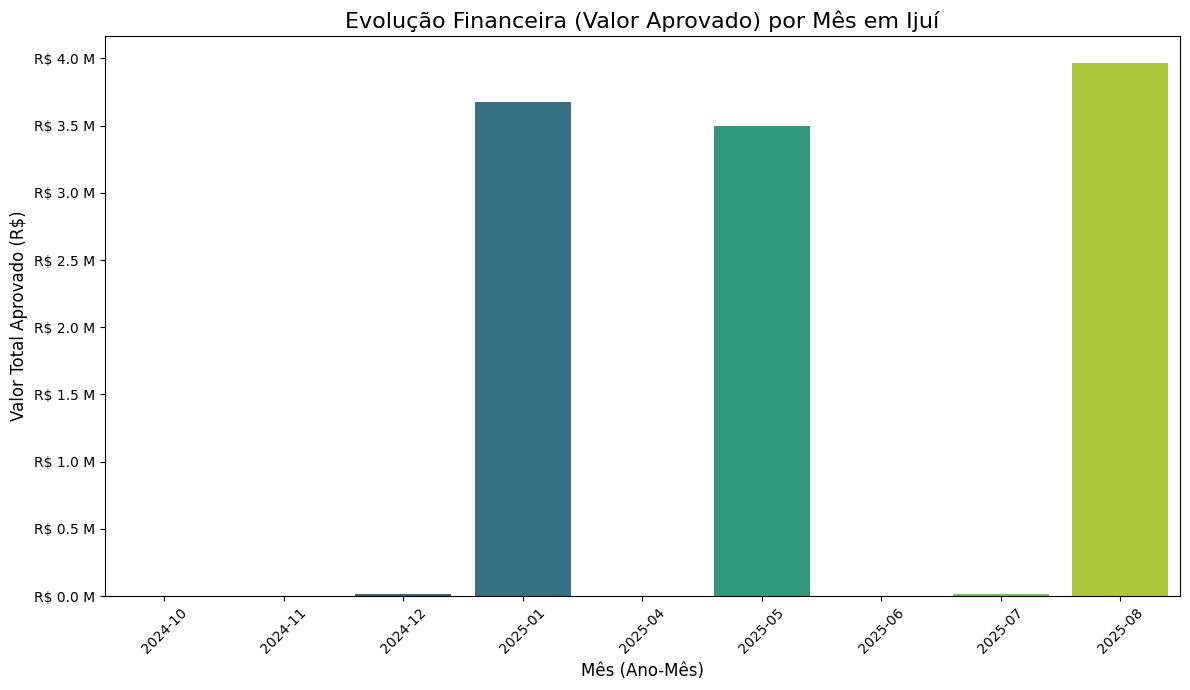

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # Importa o formatador

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' (caso o kernel tenha reiniciado) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    print("DataFrame 'df_analise_limpa' recriado com sucesso.")

    # --- Etapa 2: Preparar a Coluna de Data (PA_CMP) ---
    df_analise_limpa['DATA_COMPETENCIA'] = pd.to_datetime(df_analise_limpa['PA_CMP'], format='%Y%m')
    print("Coluna de data (PA_CMP) convertida.")

    # --- Etapa 3: Agrupar por Mês (Focando no Valor Financeiro) ---
    df_temporal_financeiro = df_analise_limpa.groupby('DATA_COMPETENCIA').agg(
        TOTAL_VALOR_APROVADO=('PA_VALAPR', 'sum')
    ).reset_index()

    # Para o Seaborn, é mais fácil se convertermos a data para string (ex: '2025-01')
    df_temporal_financeiro['MES_ANO'] = df_temporal_financeiro['DATA_COMPETENCIA'].dt.strftime('%Y-%m')
    
    print("\nEvolução mês a mês (Valor Aprovado):")
    print(df_temporal_financeiro[['MES_ANO', 'TOTAL_VALOR_APROVADO']])

    # --- Etapa 4: Gerar Gráfico com Seaborn ---
    print("\nGerando gráfico com Seaborn...")
    
    # Configura o tamanho da figura (largura, altura)
    plt.figure(figsize=(12, 7))
    
    # Cria o gráfico de barras
    ax = sns.barplot(
        data=df_temporal_financeiro,
        x='MES_ANO',
        y='TOTAL_VALOR_APROVADO',
        palette='viridis' # Define uma paleta de cores
    )
    
    # Função para formatar o eixo Y em Reais (R$ Milhões)
    def format_reais(x, pos):
        'Retorna o valor formatado como R$ 1.5 M'
        return f'R$ {x/1e6:.1f} M'
    
    # Aplica o formatador no eixo Y
    ax.yaxis.set_major_formatter(FuncFormatter(format_reais))
    
    # Adiciona títulos e labels
    plt.title('Evolução Financeira (Valor Aprovado) por Mês em Ijuí', fontsize=16)
    plt.xlabel('Mês (Ano-Mês)', fontsize=12)
    plt.ylabel('Valor Total Aprovado (R$)', fontsize=12)
    
    # Rotaciona os labels do eixo X para não sobrepor
    plt.xticks(rotation=45)
    
    # Ajusta o layout para não cortar os labels
    plt.tight_layout()
    
    # Salvar o gráfico (como imagem PNG)
    plt.savefig('evolucao_financeira_seaborn.png')
    print("Gráfico 'evolucao_financeira_seaborn.png' salvo.")

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciou).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recarregar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

# Foco em Áreas Críticas
- Oncologia: quimioterapia e radioterapia (aprovados x produzidos).
- Saúde mental: atendimentos psiquiátricos e psicológicos.
- Atenção básica: consultas e procedimentos nas UBS, acompanhamento de doenças crônicas.

## Saúde Mental:


In [41]:
import pandas as pd
import altair as alt

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' (caso o kernel tenha reiniciado) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    print("DataFrame 'df_analise_limpa' recriado com sucesso.")

    # --- Etapa 2: Definir Palavras-Chave e Filtrar ---
    
    # Lista de termos para procurar (não diferencia maiúsculas/minúsculas)
    keywords_saude_mental = [
        'PSIQUIATRIA', 
        'PSICOLOGIA', 
        'PSICOLOGO',
        'PSICOSSOCIAL', 
        'SAUDE MENTAL'
    ]
    
    # Cria o padrão de busca (ex: 'PSIQUIATRIA|PSICOLOGIA|...')
    pattern_saude_mental = '|'.join(keywords_saude_mental)
    
    print(f"Filtrando procedimentos por palavras-chave: {pattern_saude_mental}")

    # Filtra a coluna 'NOME_PROCEDIMENTO' usando o padrão
    # 'case=False' ignora maiúsculas/minúsculas
    # 'na=False' ignora valores nulos sem dar erro
    df_saude_mental = df_analise_limpa[
        df_analise_limpa['NOME_PROCEDIMENTO'].str.contains(pattern_saude_mental, case=False, na=False)
    ].copy()

    print(f"\nTotal de {len(df_saude_mental)} procedimentos de Saúde Mental encontrados.")

    # --- Etapa 3: Análise dos Procedimentos de Saúde Mental ---
    
    # Análise de Volume: Quais os procedimentos mais comuns?
    print("\n--- 🧠 Análise: Top 10 Procedimentos de Saúde Mental (Volume) ---")
    top_10_sm_volume = df_saude_mental['NOME_PROCEDIMENTO'].value_counts().head(10)
    print(top_10_sm_volume)
    
    # Análise Financeira: Qual o valor total?
    total_valor_sm = df_saude_mental['PA_VALAPR'].sum()
    print(f"\nValor Total Aprovado para Saúde Mental: R$ {total_valor_sm:,.2f}")

    # --- Etapa 4: Gerar Gráfico ---
    
    # Preparar dados para o gráfico
    df_chart_sm = top_10_sm_volume.reset_index()
    df_chart_sm.columns = ['Procedimento', 'Nº de Atendimentos']

    # Criar o gráfico de barras horizontal
    chart = alt.Chart(df_chart_sm).mark_bar().encode(
        x=alt.X('Nº de Atendimentos:Q'),
        y=alt.Y('Procedimento:N', sort='-x'),
        tooltip=['Procedimento', 'Nº de Atendimentos']
    ).properties(
        title='Top 10 Procedimentos de Saúde Mental em Ijuí'
    )

    # Salvar o gráfico
    chart.save('top_10_saude_mental.json')
    print("\nGráfico 'top_10_saude_mental.json' salvo.")

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciou).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recarregar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame 'df_analise_limpa' recriado com sucesso.
Filtrando procedimentos por palavras-chave: PSIQUIATRIA|PSICOLOGIA|PSICOLOGO|PSICOSSOCIAL|SAUDE MENTAL

Total de 19947 procedimentos de Saúde Mental encontrados.

--- 🧠 Análise: Top 10 Procedimentos de Saúde Mental (Volume) ---
NOME_PROCEDIMENTO
ACOES DE REABILITACAO PSICOSSOCIAL                                                         5112
ATENDIMENTO INDIVIDUAL DE PACIENTE EM CENTRO DE ATENCAO PSICOSSOCIAL                       4679
ATENDIMENTO EM GRUPO DE PACIENTE EM CENTRO DE ATENCAO PSICOSSOCIAL                         3333
PRATICAS EXPRESSIVAS E COMUNICATIVAS EM CENTRO DE ATENCAO PSICOSSOCIAL                     2691
ACOLHIMENTO DIURNO DE PACIENTE EM CENTRO DE ATENCAO PSICOSSOCIAL                           1932
ATENDIMENTO FAMILIAR EM CENTRO DE ATENCAO PSICOSSOCIAL                                     1616
PRATICAS CORPORAIS EM CENTRO DE ATENCAO PSICOSSOCIAL                                        408
ATENDIMENTO DOMICILIAR PARA PAC

## Oncologia

In [42]:
import pandas as pd
import altair as alt

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' (caso o kernel tenha reiniciado) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    print("DataFrame 'df_analise_limpa' recriado com sucesso.")

    # --- Etapa 2: Definir Palavras-Chave e Filtrar ---
    
    # Lista de termos para procurar
    keywords_oncologia = [
        'QUIMIOTERAPIA', 
        'RADIOTERAPIA', 
        'ONCOLOGIA',
        'ONCOLOGICO'
    ]
    
    # Cria o padrão de busca
    pattern_oncologia = '|'.join(keywords_oncologia)
    
    print(f"Filtrando procedimentos por palavras-chave: {pattern_oncologia}")

    # Filtra a coluna 'NOME_PROCEDIMENTO'
    df_oncologia = df_analise_limpa[
        df_analise_limpa['NOME_PROCEDIMENTO'].str.contains(pattern_oncologia, case=False, na=False)
    ].copy()

    print(f"\nTotal de {len(df_oncologia)} procedimentos de Oncologia encontrados.")

    # --- Etapa 3: Análise dos Procedimentos de Oncologia ---
    
    # Análise de Volume: Quais os procedimentos mais comuns?
    print("\n--- 🎗️ Análise: Top 10 Procedimentos de Oncologia (Volume) ---")
    top_10_onco_volume = df_oncologia['NOME_PROCEDIMENTO'].value_counts().head(10)
    print(top_10_onco_volume)
    
    # Análise Financeira: Qual o valor total?
    total_valor_onco = df_oncologia['PA_VALAPR'].sum()
    print(f"\nValor Total Aprovado para Oncologia: R$ {total_valor_onco:,.2f}")

    # --- Etapa 4: Análise Aprovado vs. Produzido (Item 6 Específico) ---
    print("\n--- 📊 Análise: Quantidade Aprovada vs. Produzida (Oncologia) ---")
    
    # Soma o total das colunas de quantidade
    total_produzido = df_oncologia['PA_QTDPRO'].sum()
    total_aprovado = df_oncologia['PA_QTDAPR'].sum()
    
    print(f"Total de Quantidade Produzida: {total_produzido:,.0f}")
    print(f"Total de Quantidade Aprovada: {total_aprovado:,.0f}")
    
    if total_produzido > 0:
        taxa_aprovacao = (total_aprovado / total_produzido) * 100
        print(f"Taxa de Aprovação (Qtd Aprovada / Qtd Produzida): {taxa_aprovacao:.2f}%")

    # --- Etapa 5: Gerar Gráfico (Top 10 Volume) ---
    
    df_chart_onco = top_10_onco_volume.reset_index()
    df_chart_onco.columns = ['Procedimento', 'Nº de Atendimentos']

    chart = alt.Chart(df_chart_onco).mark_bar().encode(
        x=alt.X('Nº de Atendimentos:Q'),
        y=alt.Y('Procedimento:N', sort='-x'),
        tooltip=['Procedimento', 'Nº de Atendimentos']
    ).properties(
        title='Top 10 Procedimentos de Oncologia em Ijuí (por Volume)'
    )

    chart.save('top_10_oncologia.json')
    print("\nGráfico 'top_10_oncologia.json' salvo.")

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciou).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recriar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame 'df_analise_limpa' recriado com sucesso.
Filtrando procedimentos por palavras-chave: QUIMIOTERAPIA|RADIOTERAPIA|ONCOLOGIA|ONCOLOGICO

Total de 2567 procedimentos de Oncologia encontrados.

--- 🎗️ Análise: Top 10 Procedimentos de Oncologia (Volume) ---
NOME_PROCEDIMENTO
QUIMIOTERAPIA DO ADENOCARCINOMA DE PROSTATA RESISTENTE A HORMONIOTERAPIA                       203
HORMONIOTERAPIA PREVIA A RADIOTERAPIA EXTERNA DO ADENOCARCINOMA DE PROSTATA                    177
QUIMIOTERAPIA DE DOENCA MIELOPROLIFERATIVA RARA - 1Â¦ LINHA                                    173
QUIMIOTERAPIA DE ADENOCARCINOMA DE COLON                                                       105
HORMONIOTERAPIA ADJUVANTE A RADIOTERAPIA EXTERNA DO ADENOCARCINOMA DE PROSTATA                 103
QUIMIOTERAPIA DA LEUCEMIA MIELOIDE CRONICA EM FASE CRONICA - MARCADOR POSITIVO - 1Â¦ LINHA.     96
QUIMIOTERAPIA DE MIELOMA MULTIPLO ? 1Â¦ LINHA                                                   94
QUIMIOTERAPIA DO CARCINOMA 

## Tendências de Aumento (Imacto do Envelhecimento)

In [43]:
import pandas as pd
import altair as alt

try:
    # --- Etapa 1: Recriar 'df_analise_limpa' e COLUNA DE IDADE (caso reinicie) ---
    df_analise_limpa = df_analise[df_analise['MUNICIPIO_PACIENTE'] != 'Invalido'].copy()
    
    # Recria as faixas etárias (ESSENCIAL para esta análise)
    bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, 130]
    labels = ['0-9 anos', '10-19 anos', '20-29 anos', '30-39 anos', '40-49 anos', '50-59 anos', '60-69 anos', '70-79 anos', '80+ anos']
    df_analise_limpa['FAIXA_ETARIA'] = pd.cut(df_analise_limpa['PA_IDADE'], bins=bins, labels=labels, right=True)
    
    print("DataFrame 'df_analise_limpa' e 'FAIXA_ETARIA' recriados.")

    # --- Etapa 2: Filtrar Procedimentos de CARDIOLOGIA ---
    keywords_cardio = [
        'CARDIO', 
        'CARDIOLOGIA', 
        'CARDIOLOGICO', 
        'HEMODINAMICA', 
        'CATETERISMO'
    ]
    pattern_cardio = '|'.join(keywords_cardio)
    
    df_cardio = df_analise_limpa[
        df_analise_limpa['NOME_PROCEDIMENTO'].str.contains(pattern_cardio, case=False, na=False)
    ].copy()
    
    print(f"\nEncontrados {len(df_cardio)} procedimentos de Cardiologia.")

    # --- Etapa 3: Filtrar Procedimentos de ONCOLOGIA ---
    keywords_onco = ['QUIMIOTERAPIA', 'RADIOTERAPIA', 'ONCOLOGIA', 'ONCOLOGICO']
    pattern_onco = '|'.join(keywords_onco)
    
    df_oncologia = df_analise_limpa[
        df_analise_limpa['NOME_PROCEDIMENTO'].str.contains(pattern_onco, case=False, na=False)
    ].copy()
    
    print(f"Encontrados {len(df_oncologia)} procedimentos de Oncologia.")

    # --- Etapa 4: Análise da Distribuição Etária ---
    print("\n--- 📊 Distribuição Percentual por Faixa Etária ---")
    
    # normalize=True calcula a porcentagem (ex: 0.25)
    # .sort_index() mantém a ordem das faixas (0-9, 10-19...)
    
    # Análise de Cardiologia
    print("\n🩺 CARDIOLOGIA (% por Faixa Etária):")
    dist_cardio_idade = (df_cardio['FAIXA_ETARIA'].value_counts(normalize=True).sort_index() * 100).round(2)
    print(dist_cardio_idade)
    
    # Análise de Oncologia
    print("\n🎗️ ONCOLOGIA (% por Faixa Etária):")
    dist_onco_idade = (df_oncologia['FAIXA_ETARIA'].value_counts(normalize=True).sort_index() * 100).round(2)
    print(dist_onco_idade)

except NameError as e:
    print(f"Erro: {e}")
    print("\n--- ⚠️ Atenção! ---")
    print("Parece que o estado da memória do notebook foi perdido (kernel reiniciou).")
    print("Não consigo encontrar o DataFrame 'df_analise'.")
    print("Por favor, rode novamente a célula de código '🚀 Código Principal (Foco em Ijuí...)' para recarregar os dados.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame 'df_analise_limpa' e 'FAIXA_ETARIA' recriados.

Encontrados 3270 procedimentos de Cardiologia.
Encontrados 2567 procedimentos de Oncologia.

--- 📊 Distribuição Percentual por Faixa Etária ---

🩺 CARDIOLOGIA (% por Faixa Etária):
FAIXA_ETARIA
0-9 anos       0.43
10-19 anos     0.76
20-29 anos     2.75
30-39 anos     4.68
40-49 anos     8.35
50-59 anos    19.08
60-69 anos    31.13
70-79 anos    25.47
80+ anos       7.34
Name: proportion, dtype: float64

🎗️ ONCOLOGIA (% por Faixa Etária):
FAIXA_ETARIA
0-9 anos       0.00
10-19 anos     0.08
20-29 anos     1.71
30-39 anos     4.95
40-49 anos     9.70
50-59 anos    17.22
60-69 anos    29.92
70-79 anos    26.02
80+ anos      10.40
Name: proportion, dtype: float64


# Comparação de Ijuí com Cruz Alta e Santa Rosa